In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
!pip install tensorflow
from sklearn import svm
from tensorflow.keras.layers import Dense , BatchNormalization , Dropout , LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/332.0 MB 6.7 MB/s eta 0:00:50
   ---------------------------------------- 1.8/332.0 MB 4.5 MB/s eta 0:01:14
   ---------------------------------------- 2.6/332.0 MB 4.3 MB/s eta 0:01:17
   ---------------------------------------- 3.4/332.0 MB 4.2 MB/s eta 0:01:19
    --------------------------------------- 4.5/332.0 MB 4.1 MB/s eta 0:01:21
    --------------------------------------- 5.2/332.0 MB 4.1 MB/s eta 0:01:21
    --------------------------------------- 6.0/332.0 MB 4.0 MB/s eta 0:01:21
    --------------------------------------- 6.8/332.0 MB 4.0 MB/s eta 0:01:21
    --------------------------------------- 7.6/332.0 MB 4.0 MB/s eta 0:01:21
   - -------------------------------------- 8.4/332.0 MB 4.0 MB/s eta 0:01:21
   - -------------------------------------- 9.2/332.0 MB 4.0 MB/s eta 0:01:22
   - -------------------------------------- 10.0/332.0 MB 4.0 MB/s eta 

In [8]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [9]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


C:\Users\SHAIBA\AppData\Local\Temp\ipykernel_448\2204360879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data_df["DEATH_EVENT"], palette=cols)


[Text(0, 0, '203')]

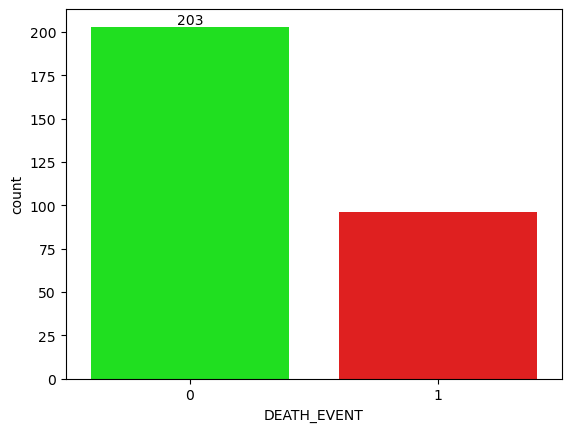

In [12]:
cols = ["#00FF00" , "#FF0000"]
ax = sns.countplot(x=data_df["DEATH_EVENT"], palette=cols)
ax.bar_label(ax.containers[0])

In [13]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


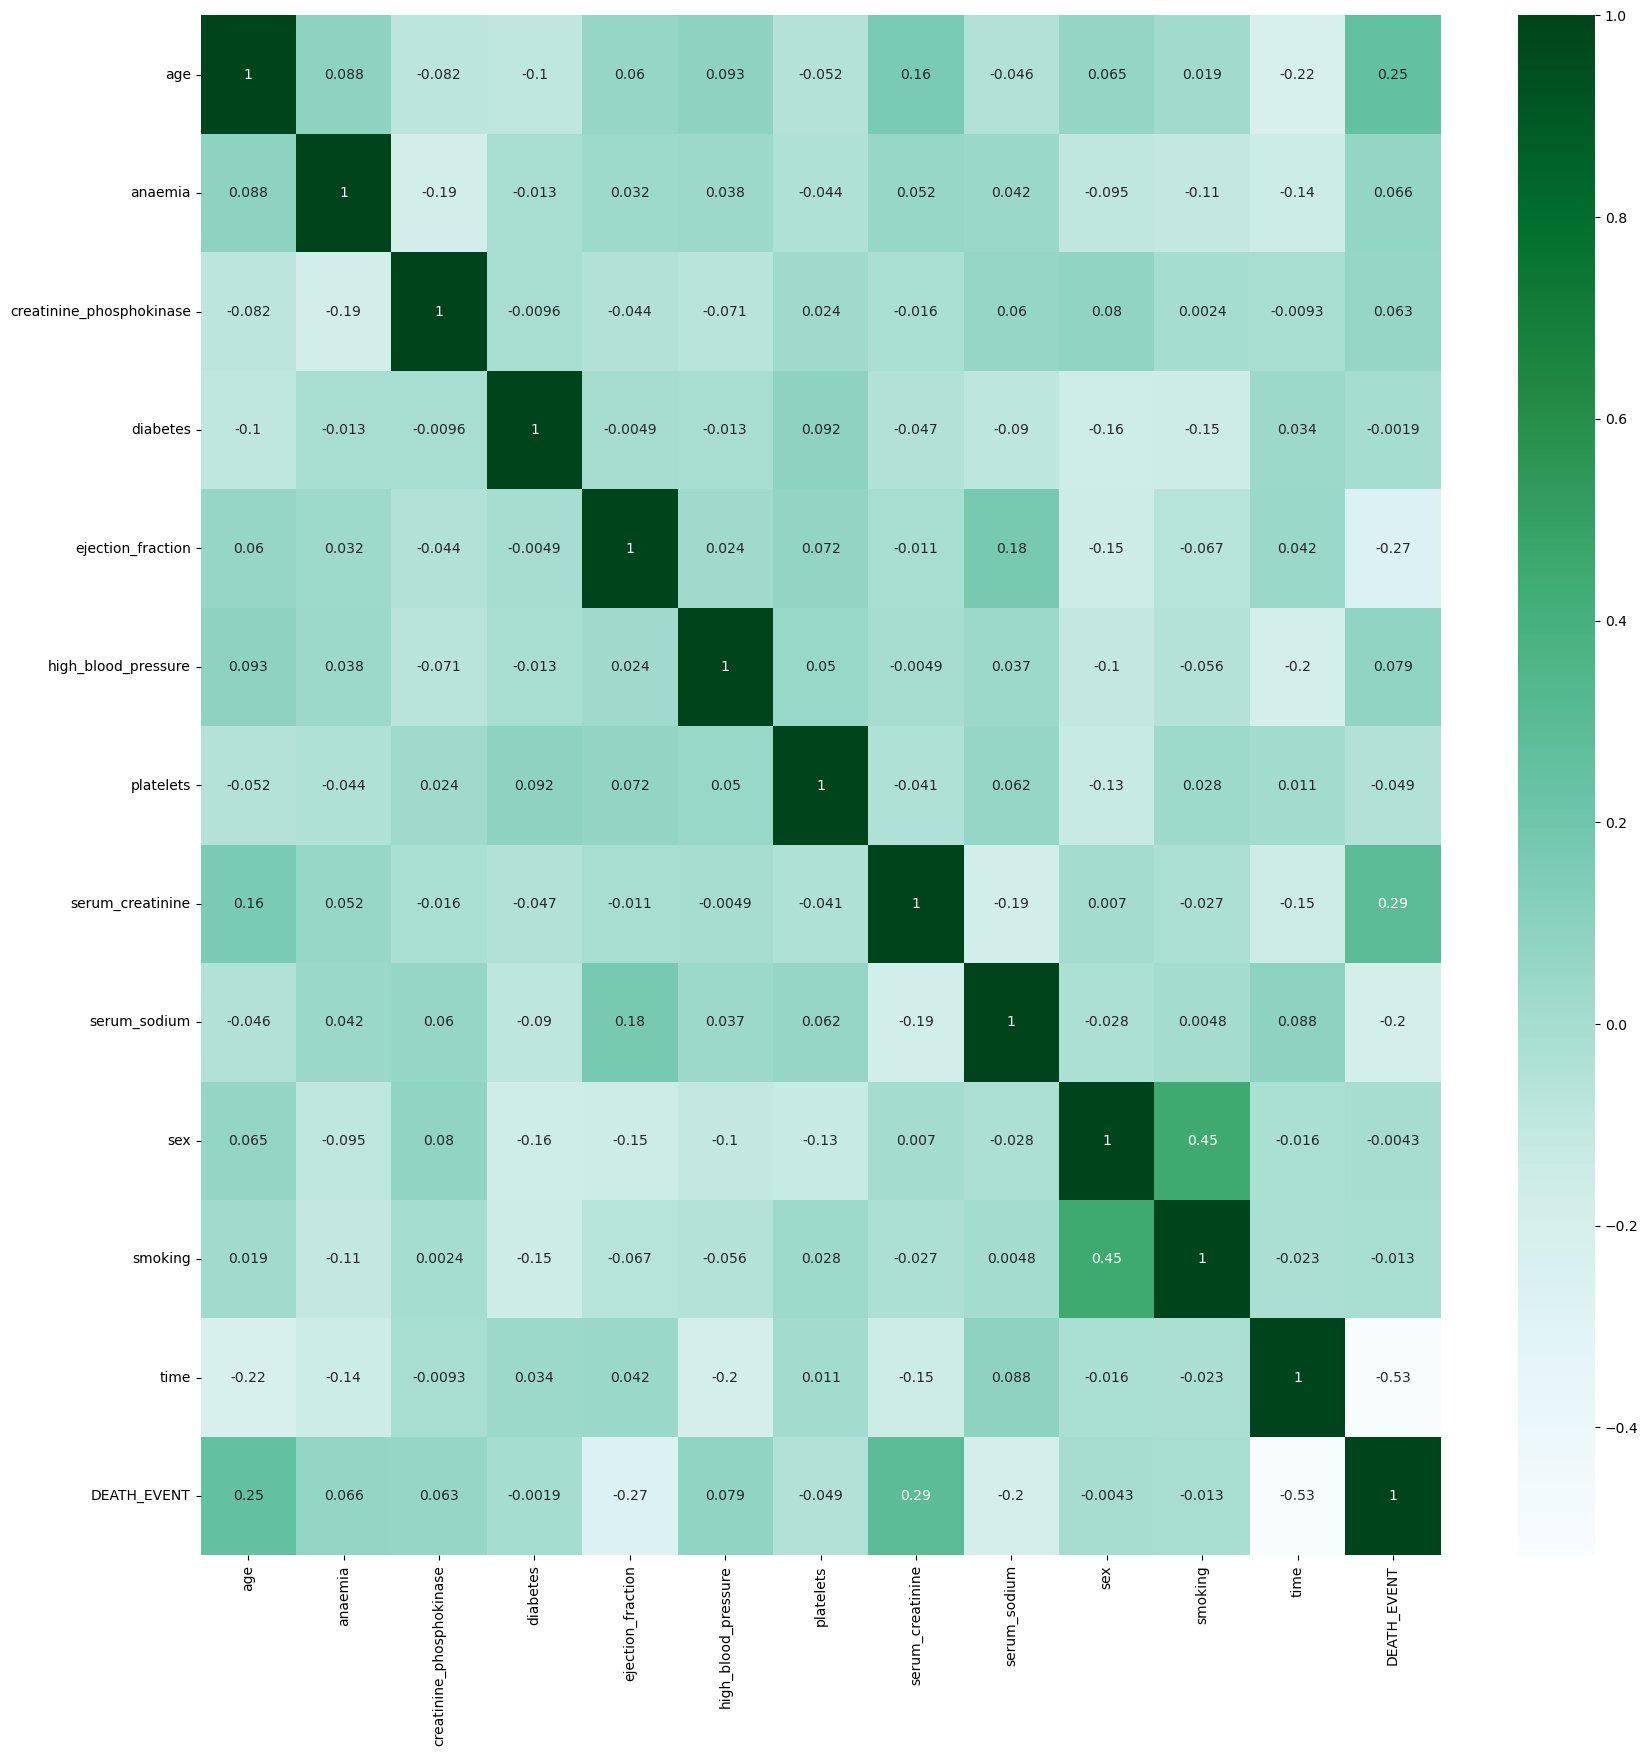

In [16]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(), cmap ="BuGn" , annot = True)
plt.show()

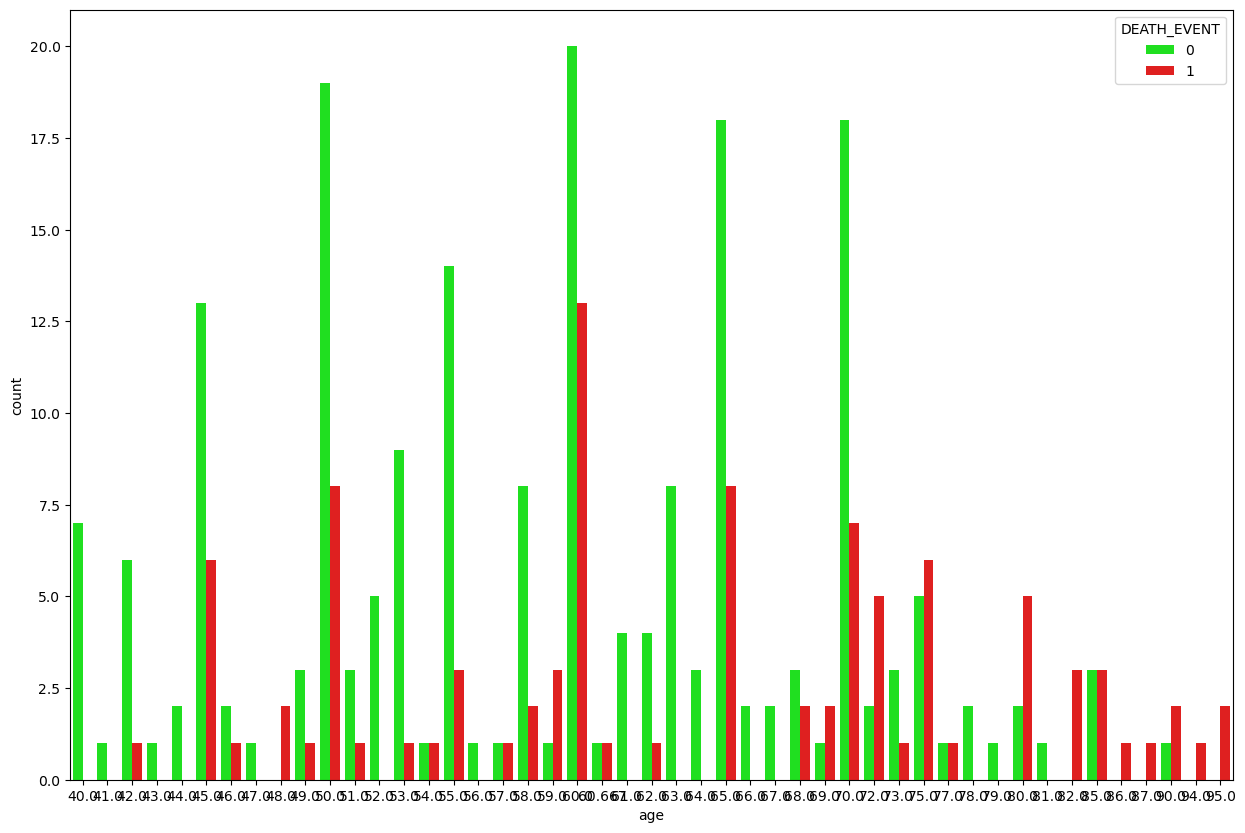

In [17]:
plt.figure(figsize=(15,10))
days_of_week = sns.countplot(x=data_df['age'] , data=data_df , hue="DEATH_EVENT" , palette = cols)

C:\Users\SHAIBA\AppData\Local\Temp\ipykernel_448\1453762731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"] ,y=data_df[i], palette=cols)


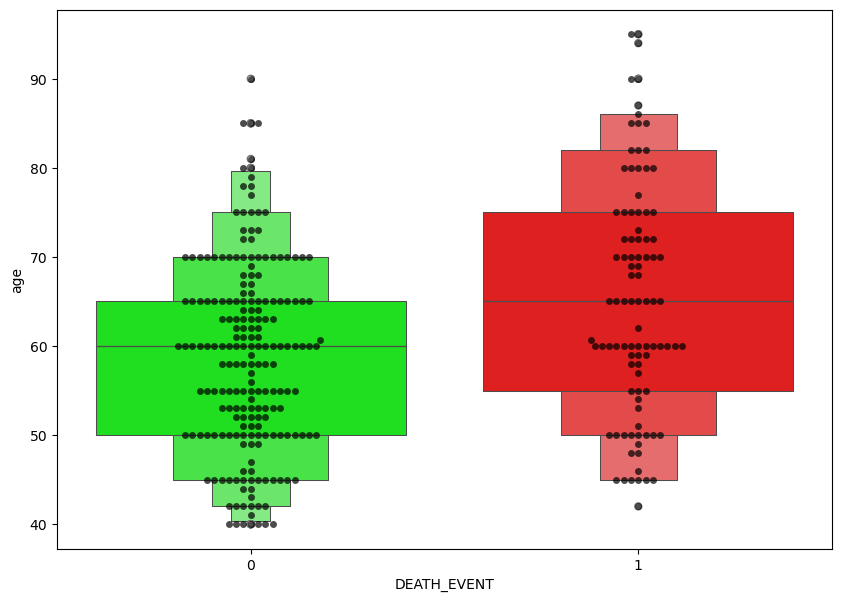

C:\Users\SHAIBA\AppData\Local\Temp\ipykernel_448\1453762731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"] ,y=data_df[i], palette=cols)
C:\Users\SHAIBA\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


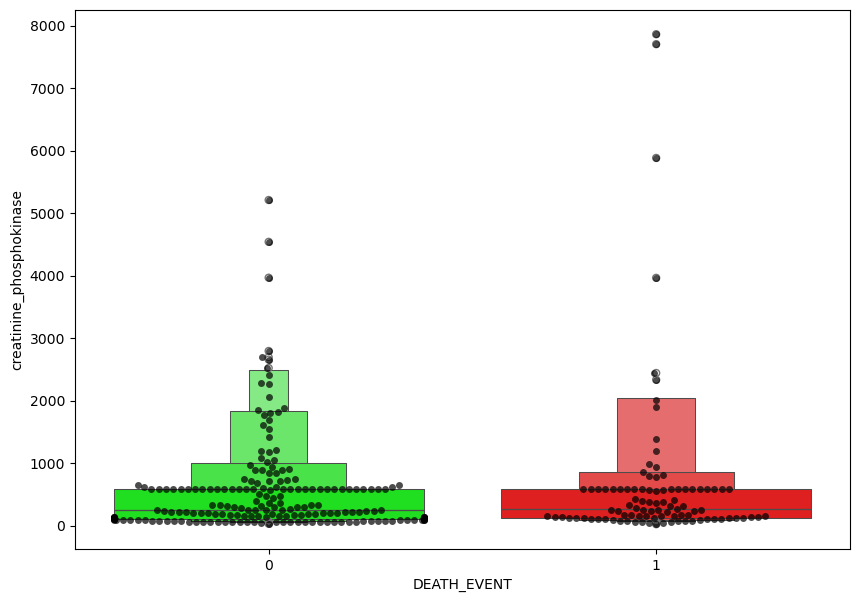

C:\Users\SHAIBA\AppData\Local\Temp\ipykernel_448\1453762731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"] ,y=data_df[i], palette=cols)


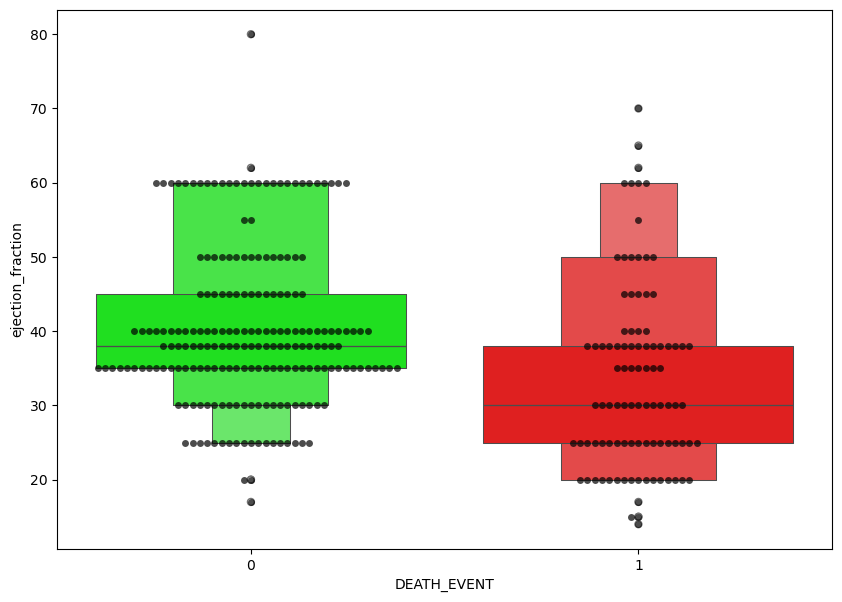

C:\Users\SHAIBA\AppData\Local\Temp\ipykernel_448\1453762731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"] ,y=data_df[i], palette=cols)


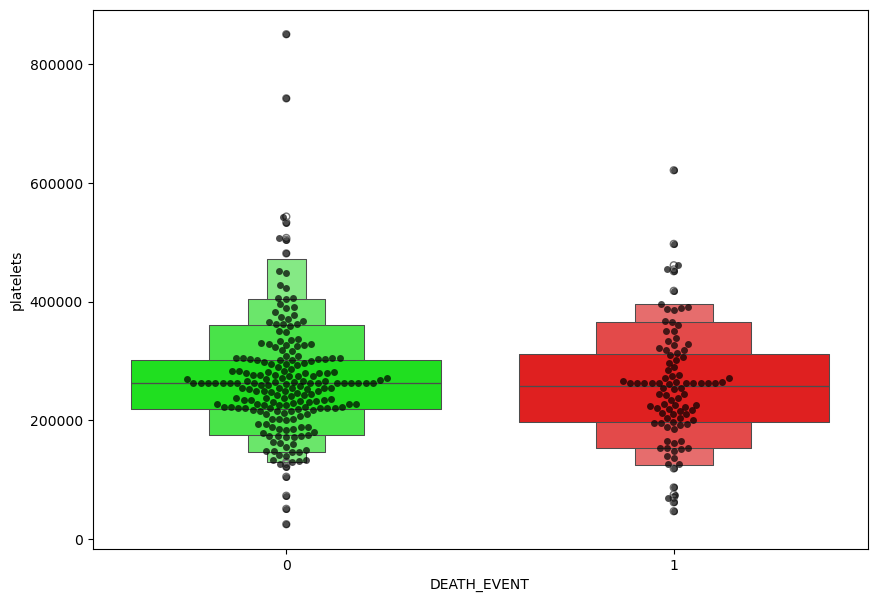

C:\Users\SHAIBA\AppData\Local\Temp\ipykernel_448\1453762731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"] ,y=data_df[i], palette=cols)
C:\Users\SHAIBA\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


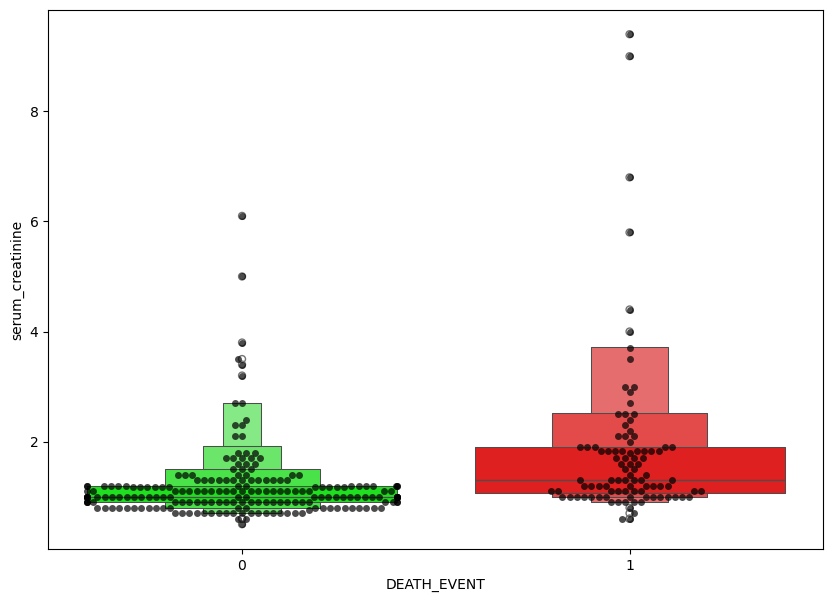

C:\Users\SHAIBA\AppData\Local\Temp\ipykernel_448\1453762731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"] ,y=data_df[i], palette=cols)


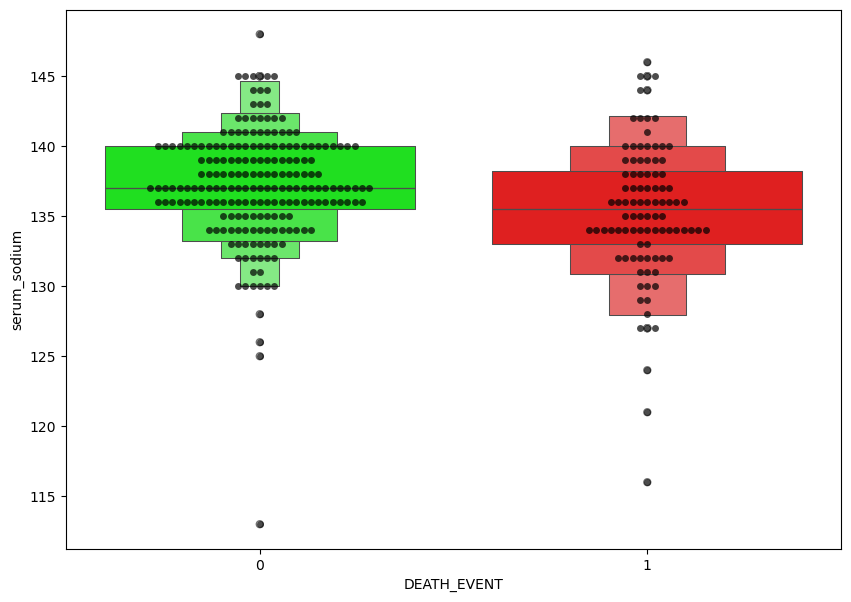

C:\Users\SHAIBA\AppData\Local\Temp\ipykernel_448\1453762731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"] ,y=data_df[i], palette=cols)


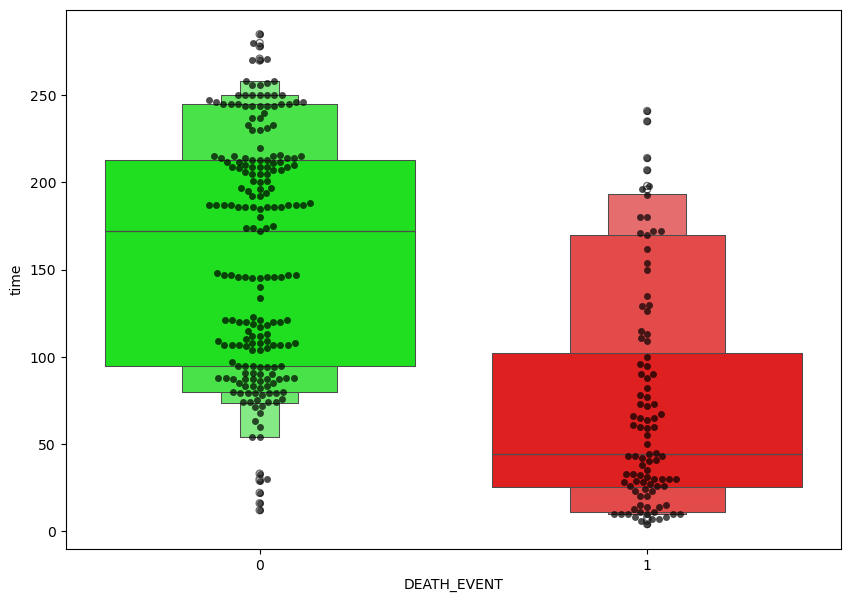

In [20]:
feature = ["age" , "creatinine_phosphokinase" , "ejection_fraction" , "platelets" , "serum_creatinine" , "serum_sodium" , "time"]
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"] ,y=data_df[i], color = "black" , alpha=0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"] ,y=data_df[i], palette=cols)
    plt.show()

In [21]:
x=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]

In [27]:
col_name = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_scaled = s_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled , columns=col_name)


In [28]:
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


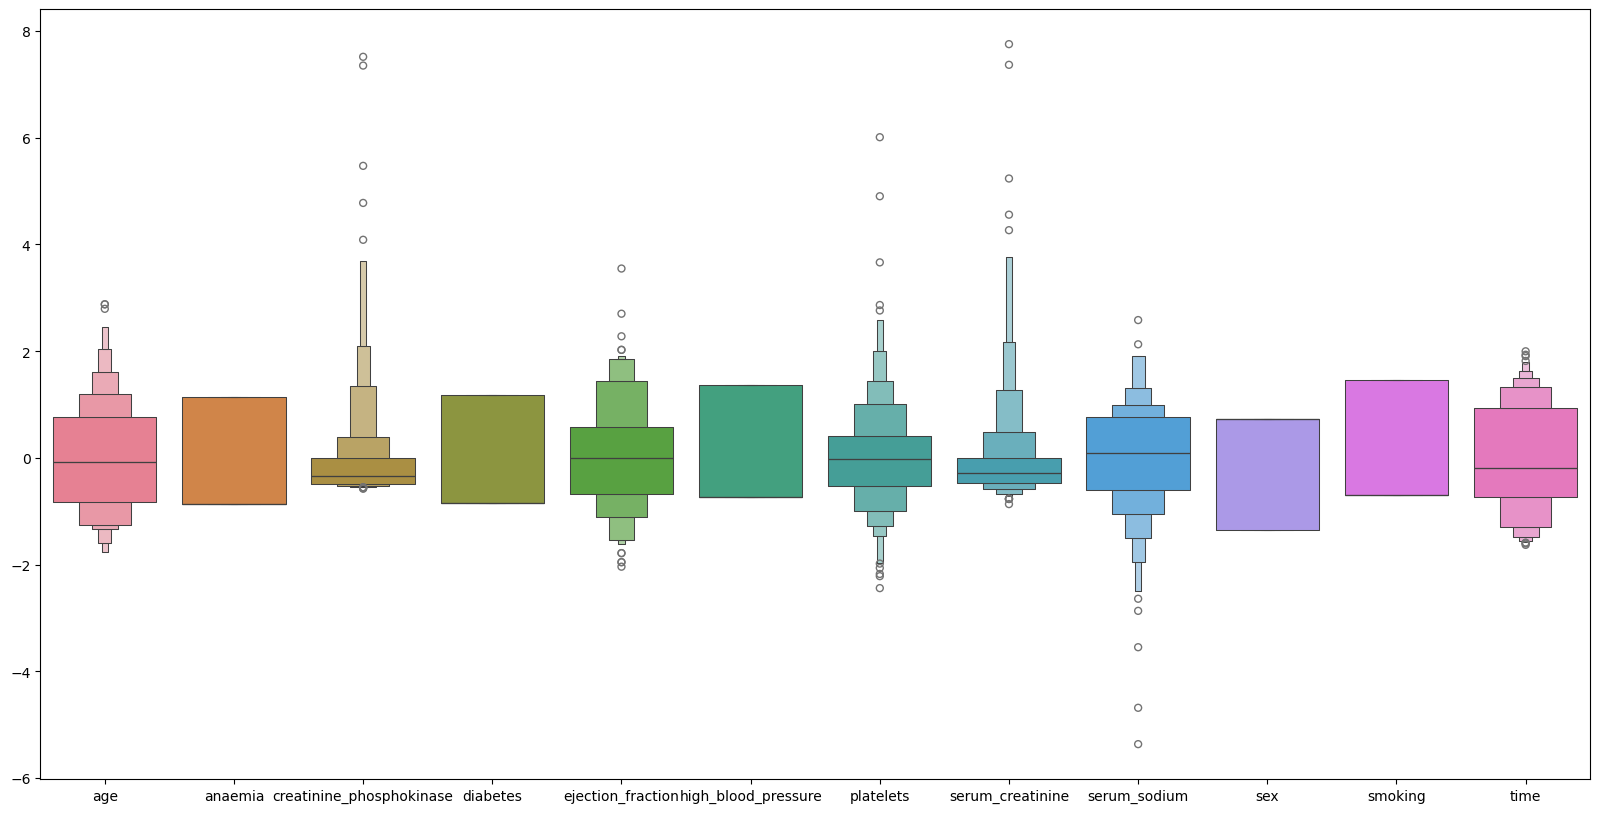

In [29]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=x_scaled)
plt.show()

In [30]:
x_train, x_tests , y_train , y_test = train_test_split(x_scaled, y, test_size=0.3)

In [31]:
model1 = svm.SVC()


In [32]:
model1.fit(x_train, y_train)

SVC()

In [34]:
y_pred = model1.predict(x_tests)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [36]:
y_test

187    1
242    0
188    0
103    0
271    0
      ..
276    0
60     1
175    0
68     1
88     0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [37]:
y_train

208    0
154    0
286    0
29     1
134    0
      ..
180    0
194    1
111    0
292    0
296    0
Name: DEATH_EVENT, Length: 209, dtype: int64

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        62
           1       0.67      0.43      0.52        28

    accuracy                           0.76        90
   macro avg       0.72      0.67      0.68        90
weighted avg       0.74      0.76      0.74        90



In [39]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, patience = 20 , restore_best_weights = True)
model = Sequential()

model.add(Dense(units=16, kernel_initializer = 'uniform', activation='relu', input_dim=(12)))
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units= 1, kernel_initializer = 'uniform', activation='sigmoid'))


C:\Users\SHAIBA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(x_train, y_train, epochs=100, batch_size=25, callbacks=[early_stopping] , validation_split=0.25)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6538 - loss: 0.6927 - val_accuracy: 0.6792 - val_loss: 0.6918
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6731 - loss: 0.6914 - val_accuracy: 0.6792 - val_loss: 0.6905
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6731 - loss: 0.6901 - val_accuracy: 0.6792 - val_loss: 0.6892
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6731 - loss: 0.6889 - val_accuracy: 0.6792 - val_loss: 0.6878
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6731 - loss: 0.6873 - val_accuracy: 0.6792 - val_loss: 0.6863
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6731 - loss: 0.6861 - val_accuracy: 0.6792 - val_loss: 0.6846
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6731 - loss: 0.6839 - val_accuracy: 0.6792 - val_loss: 0.6826
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6731 - loss: 0.6816 - val_accuracy: 0.6792 - val_loss

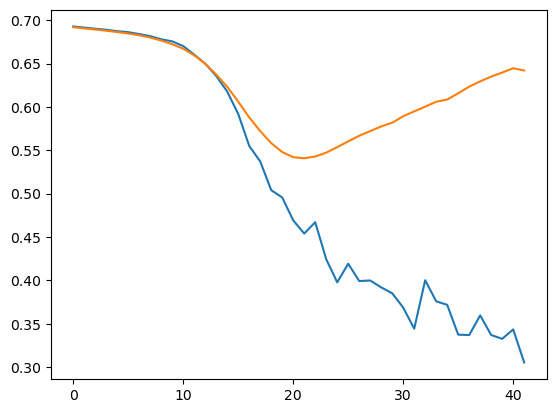

In [44]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[: , ['loss']] , label = "Training loss")
plt.plot(history_df.loc[: , ['val_loss']] , label = "Validation loss")
plt.show()

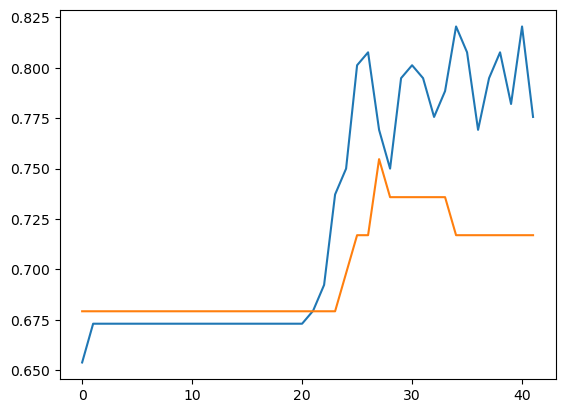

In [45]:
plt.plot(history_df.loc[: , ['accuracy']] , label = "Training accuracy")
plt.plot(history_df.loc[: , ['val_accuracy']] , label = "Validation accuracy")
plt.show()

In [46]:
y_pred = model.predict(x_tests)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step 


In [48]:
 y_pred = (y_pred > 0.5)

In [49]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        62
           1       0.00      0.00      0.00        28

    accuracy                           0.69        90
   macro avg       0.34      0.50      0.41        90
weighted avg       0.47      0.69      0.56        90



C:\Users\SHAIBA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHAIBA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHAIBA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
